In [ ]:
"""
==========================================
Fuzzy Control Systems: The Tipping Problem
==========================================

The 'tipping problem' is commonly used to illustrate the power of fuzzy logic
principles to generate complex behavior from a compact, intuitive set of
expert rules.

If you're new to the world of fuzzy control systems, you might want
to check out the `Fuzzy Control Primer
<../userguide/fuzzy_control_primer.html>`_
before reading through this worked example.

The Tipping Problem
-------------------

Let's create a fuzzy control system which models how you might choose to tip
at a restaurant.  When tipping, you consider the service and food quality,
rated between 0 and 10.  You use this to leave a tip of between 0 and 25%.

We would formulate this problem as:

* Antecednets (Inputs)
   - `service`
      * Universe (ie, crisp value range): How good was the service of the wait
        staff, on a scale of 0 to 10?
      * Fuzzy set (ie, fuzzy value range): poor, acceptable, amazing
   - `food quality`
      * Universe: How tasty was the food, on a scale of 0 to 10?
      * Fuzzy set: bad, decent, great
* Consequents (Outputs)
   - `tip`
      * Universe: How much should we tip, on a scale of 0% to 25%
      * Fuzzy set: low, medium, high
* Rules
   - IF the *service* was good  *or* the *food quality* was good,
     THEN the tip will be high.
   - IF the *service* was average, THEN the tip will be medium.
   - IF the *service* was poor *and* the *food quality* was poor
     THEN the tip will be low.
* Usage
   - If I tell this controller that I rated:
      * the service as 9.8, and
      * the quality as 6.5,
   - it would recommend I leave:
      * a 20.2% tip.


Creating the Tipping Controller Using the skfuzzy control API
-------------------------------------------------------------

We can use the `skfuzzy` control system API to model this. First, let's install scikit-fuzzy package 
"""



In [2]:
pip install -U scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [14]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
# service.automf(3)

service['bad'] = fuzz.trapmf(service.universe, [0, 0, 3, 5])
service['decent'] = fuzz.trimf(service.universe, [0, 4, 10])
service['good'] = fuzz.trimf(service.universe, [3, 10, 10])


# Custom membership functions can be built interactively with a familiar,
# Pythonic API
quality['bad'] = fuzz.trimf(quality.universe, [0, 0, 5])
quality['decent'] = fuzz.trimf(quality.universe, [0, 4, 10])
quality['good'] = fuzz.trimf(quality.universe, [3, 10, 10])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

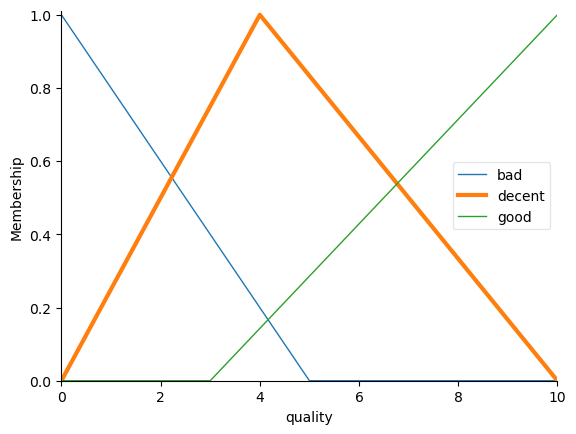

In [15]:
#To help understand what the membership looks like, use the ``view`` methods.
quality['decent'].view()

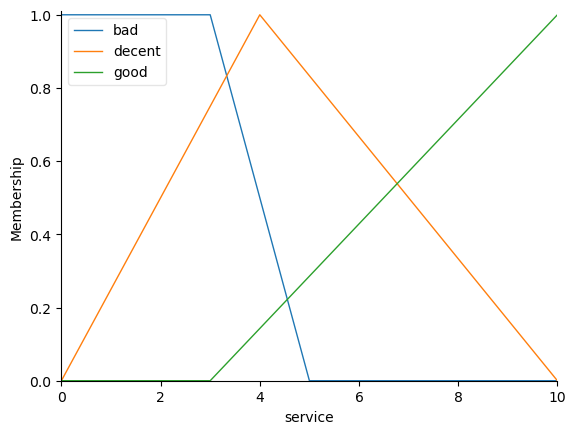

In [16]:
service.view()

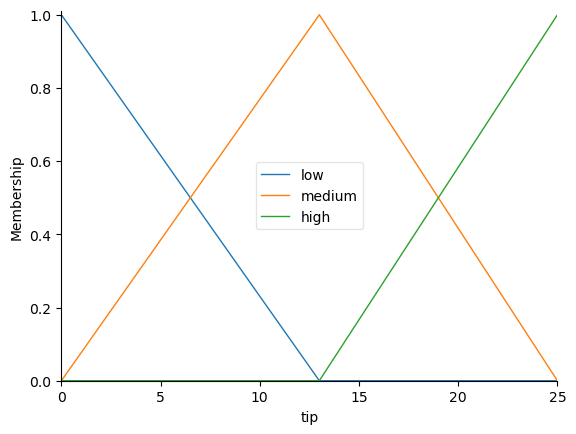

In [11]:
tip.view()

In [ ]:
'''Fuzzy rules
-----------

Now, to make these triangles useful, we define the *fuzzy relationship*
between input and output variables. For the purposes of our example, consider
three simple rules:

1. If the food is poor OR the service is poor, then the tip will be low
2. If the service is average, then the tip will be medium
3. If the food is good OR the service is good, then the tip will be high.

Most people would agree on these rules, but the rules are fuzzy. Mapping the
imprecise rules into a defined, actionable tip is a challenge. This is the
kind of task at which fuzzy logic excels.

'''

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

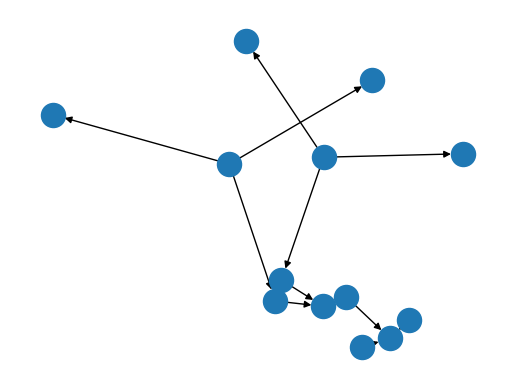

In [19]:
rule1 = ctrl.Rule(quality['decent'] | service['bad'], tip['low'])
rule2 = ctrl.Rule(service['decent'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule3.view()

In [ ]:
'''Control System Creation and Simulation
---------------------------------------

Now that we have our rules defined, we can simply create a control system
via:
'''

In [20]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [ ]:
'''In order to simulate this control system, we will create a ControlSystemSimulation. 
Think of this object representing our controller applied to a specific set of cirucmstances. 
For tipping, this might be tipping Sharon at the local brew-pub. 
We would create another ControlSystemSimulation when we’re trying to apply our tipping_ctrl for 
Travis at the cafe because the inputs would be different.'''

In [21]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [ ]:
'''We can now simulate our control system by simply specifying the inputs
and calling the ``compute`` method.  Suppose we rated the quality 6.5 out of 10
and the service 9.8 of 10.
'''

In [22]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 5.0
tipping.input['service'] = 8.0

# Crunch the numbers
tipping.compute()

12.121000220284484


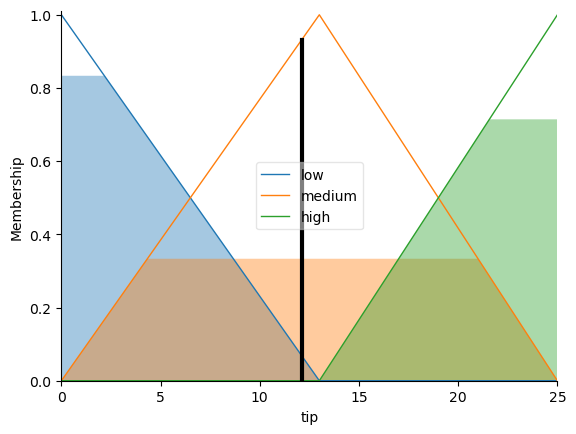

In [23]:
print(tipping.output['tip'])
tip.view(sim=tipping)